<a href="https://colab.research.google.com/github/elliemci/vision-transformer-models/blob/main/image_segmentation/data_preproces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain MRI dataset visualization and pre-processing for semantic image segmnetation that identifies tumor location and boundaries, evaluated with custom segmentation accuracy metric

In [ ]:
!nvidia-smi

In [1]:
!pip install --upgrade fsspec==2024.10.0

In [2]:
!pip show fsspec

Name: fsspec
Version: 2024.10.0
Summary: File-system specification
Home-page: https://github.com/fsspec/filesystem_spec
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2018, Martin Durant
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote products derived from
          this softwar

In [3]:
!pip check fsspec

ipython 7.34.0 requires jedi, which is not installed.
pygobject 3.42.1 requires pycairo, which is not installed.


In [2]:
!pip install jedi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [3]:
# install system dependencies
!apt-get install libcairo2-dev pkg-config python3-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin
  libice-dev liblzo2-2 libmount-dev libmount1 libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev
  libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev libglib2

In [4]:
!pip install pycairo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.5/661.5 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycairo: filename=pycairo-1.27.0-cp310-cp310-linux_x86_64.whl size=128157 sha256=0b46a84bbb75c72849dce945e19f06eaa03518c90d0fd92f8348e70efa3a3fde
  Stored in directory: /root/.cache/pip/wheels/c3/76/e4/134a2e849a3082926653cb544793d9642aed12399436f422d1
Successfully built pycairo


In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
pip install --upgrade huggingface_hub

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls /content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation

data_preproces.ipynb  mri_data_seg


In [8]:
%cd /content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation

/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation


In [ ]:
from huggingface_hub import login

## 1. Load and visualize MRI dataset

MRI brain images with tumor regions identifies as a corresponding masks

In [12]:
%pwd

'/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation'

In [13]:
!ls mri_data_seg/images

test  train


In [14]:
import os
# list the first 10 file names in a image and mask directories
test_imgs_path = "mri_data_seg/images/test"
print(os.listdir(test_imgs_path)[:10])
test_mask_path = "mri_data_seg/masks/test"
print(os.listdir(test_mask_path)[:10])

['mri_mening_img503.png', 'mri_mening_img502.png', 'mri_mening_img501.png', 'mri_mening_img504.png', 'mri_mening_img500.png', 'mri_mening_img509.png', 'mri_mening_img507.png', 'mri_mening_img506.png', 'mri_mening_img505.png', 'mri_mening_img508.png']
['mri_mening_mask500.png', 'mri_mening_mask503.png', 'mri_mening_mask501.png', 'mri_mening_mask502.png', 'mri_mening_mask508.png', 'mri_mening_mask504.png', 'mri_mening_mask509.png', 'mri_mening_mask507.png', 'mri_mening_mask505.png', 'mri_mening_mask506.png']


Sort images and masks by trailing 3-digit file name number

In [15]:
from datasets import load_dataset, Image

# load_dataset from Hugging Face datasets package loads and orderes local files, has an 'image' type column
# which contain PIL obj
imgs_data = load_dataset("imagefolder", data_dir="mri_data_seg/images")
mask_data = load_dataset("imagefolder", data_dir="mri_data_seg/masks")

Resolving data files:   0%|          | 0/500 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Resolving data files:   0%|          | 0/500 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

**NB** dataset loading sorts the order of the file names

In [ ]:
print(imgs_data['train'][0]['image'])

<PIL.PngImagePlugin.PngImageFile image mode=L size=512x512 at 0x7860A2DF4C40>


In [ ]:
print(list(imgs_data.items()))
print(list(mask_data.items()))

[('train', Dataset({
    features: ['image', 'label'],
    num_rows: 500
})), ('test', Dataset({
    features: ['image', 'label'],
    num_rows: 200
}))]
[('train', Dataset({
    features: ['image', 'label'],
    num_rows: 500
})), ('test', Dataset({
    features: ['image', 'label'],
    num_rows: 200
}))]


In [ ]:
# list the filenames of the first 10 files of the imgs_data['test']['image']
for item in imgs_data['test']['image'][:10]:
  print(item.filename)

/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation/mri_data_seg/images/test/mri_mening_img500.png
/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation/mri_data_seg/images/test/mri_mening_img501.png
/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation/mri_data_seg/images/test/mri_mening_img502.png
/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation/mri_data_seg/images/test/mri_mening_img503.png
/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation/mri_data_seg/images/test/mri_mening_img504.png
/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation/mri_data_seg/images/test/mri_mening_img505.png
/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation/mri_data_seg/images/test/mri_mening_img506.png
/content/drive/MyDrive/ColabNotebooks/ExplainableAI/image_segmentation/mri_data_seg/images/test/mri_mening_img507.png
/content/drive/MyDrive/ColabNotebooks/ExplainableAI/imag

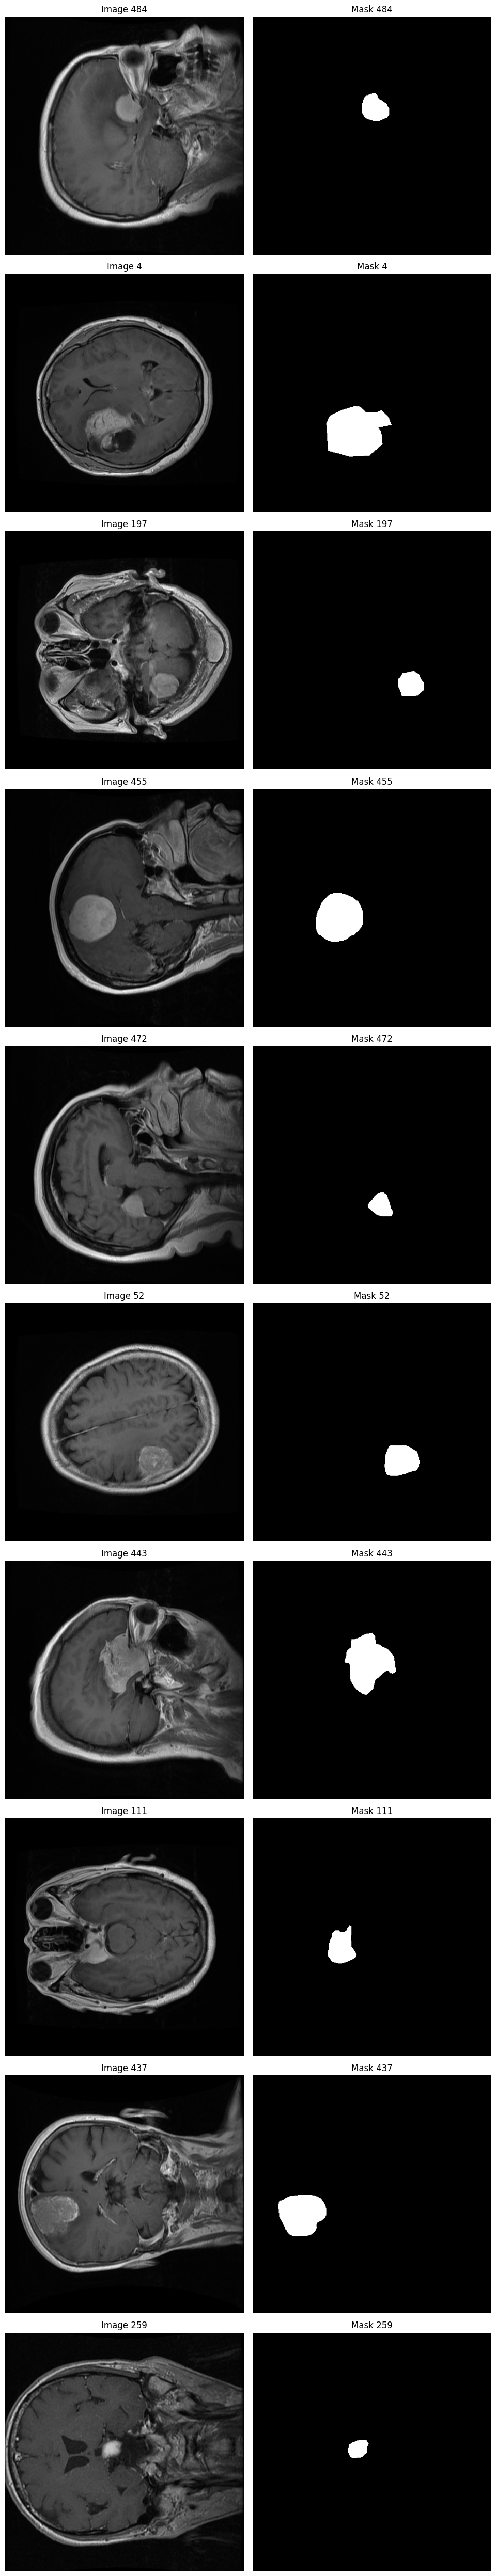

In [ ]:
import random
import matplotlib.pyplot as plt

def display_random_images_and_masks(imgs_data, mask_data, num_images=10):
  """Displays random images and their corresponding masks, where imgs_data is the
     dataset containing the images and mask_data is the dataset containing the masks
  """
  # Get the indices of random images
  indices = random.sample(range(len(imgs_data['train'])), num_images)

  # Create a figure and axes
  fig, axs = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

  # Display the images and masks
  for i, index in enumerate(indices):
    image = imgs_data['train'][index]['image']
    mask = mask_data['train'][index]['image']

    axs[i, 0].imshow(image, cmap='gray')
    axs[i, 0].set_title(f"Image {index}")
    axs[i, 0].axis("off")

    axs[i, 1].imshow(mask, cmap='gray')
    axs[i, 1].set_title(f"Mask {index}")
    axs[i, 1].axis("off")

  plt.tight_layout()
  plt.show()

# Call the function to display the images and masks
display_random_images_and_masks(imgs_data, mask_data)

## 2. Custom segmentation dataset

In [9]:
from datasets import Dataset, DatasetDict, Image

In [10]:
# count files in folder and subfolders
!find mri_data_seg/images | wc -l

703


In [11]:
!find mri_data_seg/images/train | wc -l

501


In [12]:
!find mri_data_seg/masks | wc -l

703


In [13]:
!find mri_data_seg/masks/train | wc -l

501


In [25]:
import os
from datasets import load_dataset, Dataset, DatasetDict, Image

def create_segmentation_dataset(images_dir, masks_dir):
    """ Creates a segmentation dataset from images and corresponding masks using
    a returning a datasets.DatasetDict."""

    image_files = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
    mask_files = sorted([os.path.join(masks_dir, f) for f in os.listdir(masks_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

    # make sure image and mask files have the same names and order
    image_filenames = [os.path.basename(f) for f in image_files]
    mask_filenames = [os.path.basename(f) for f in mask_files]

    # create a Dataset object from a dictionary
    dataset = Dataset.from_dict({
        "pixel_values": image_files,
        "label": mask_files
    })

    # Cast the columns to Image type
    dataset = dataset.cast_column("pixel_values", Image())
    dataset = dataset.cast_column("label", Image())

    return dataset

imgs_train_dir = "mri_data_seg/images/train"
masks_train_dir = "mri_data_seg/masks/train"

imgs_test_dir = "mri_data_seg/images/test"
masks_test_dir = "mri_data_seg/masks/test"

# create training and validation datasets
train_dataset = create_segmentation_dataset(imgs_train_dir, masks_train_dir)
test_dataset = create_segmentation_dataset(imgs_test_dir, masks_test_dir)

dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

dataset

DatasetDict({
    train: Dataset({
        features: ['pixel_values', 'label'],
        num_rows: 500
    })
    test: Dataset({
        features: ['pixel_values', 'label'],
        num_rows: 200
    })
})

In [26]:
# further split and rename
seg_train = dataset['train'].train_test_split(test_size=0.2)
#seg_test = seg_train['test']

# gater train, test and val data into a single DatasetDict
seg_dataset = DatasetDict({
    "train": seg_train['train'],
    "test": dataset['test'],
    "validate": seg_train['test'],
})

seg_dataset

DatasetDict({
    train: Dataset({
        features: ['pixel_values', 'label'],
        num_rows: 400
    })
    test: Dataset({
        features: ['pixel_values', 'label'],
        num_rows: 200
    })
    validate: Dataset({
        features: ['pixel_values', 'label'],
        num_rows: 100
    })
})

## Data Checks

Display the number of training, test and validation images, display image and coresponding mask, their image size, data types and dimensions; display label values in the mask.

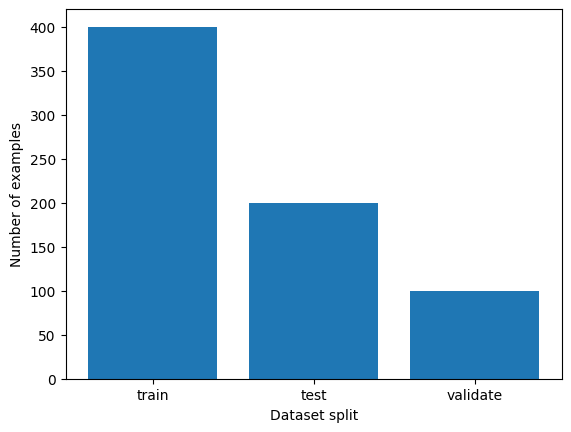

In [27]:
# plot number of segmentation_dataset["train"] and segmentation_dataset["test"]
import matplotlib.pyplot as plt
#plot number of segmentation_dataset["train"] and segmentation_dataset["test"]
plt.bar(["train", "test", "validate"], [len(seg_dataset["train"]), len(seg_dataset["test"]), len(seg_dataset["validate"])])
plt.xlabel("Dataset split")
plt.ylabel("Number of examples")
plt.show()

### Convert integer to class name labels

In [29]:
# display labels
seg_dataset["train"].features["label"]

Image(mode=None, decode=True, id=None)

In [32]:
# create an id2label mapping to convert the pixel values in mask from integers to class names
id2label = {0: "background", 1: "tumor"}
print(f'integer to class name mapping: {id2label}')
label2id= { label : id for id, label in id2label.items()}
n_classes = len(id2label)
print(f'number of label classes: {n_classes}')

integer to class name mapping: {0: 'background', 1: 'tumor'}
number of label classes: 2


## 3. Data checks

In [40]:
import numpy as np

# access the training data first image
example_img = seg_dataset["train"][0]["pixel_values"]
example_mask = seg_dataset["train"][0]["label"]
# conver PIL PngImageFile obj to NumPy array
image_np = np.array(example_img)
mask_np = np.array(example_mask)

# access the dtype atribute of numpy array
print(f"Image dimensions: {example_img.size}")
print(f"Image data type: {image_np.dtype}")
print(f"Image min value: {image_np.min()}")
print(f"Image max value: {image_np.max()}")

print(f"Mask dimensions: {example_mask.size}")
print(f"Mask data type: {mask_np.dtype}")
print(f"Mask min value: {mask_np.min()}")
print(f"Mask max value: {mask_np.max()}")

# only back and white pixels in mask
print(f"Labels in mask:, {np.unique(mask_np)}")
#print(f"Labels in mask:, {np.unique(image_np)}")

Image dimensions: (512, 512)
Image data type: uint8
Image min value: 0
Image max value: 255
Mask dimensions: (512, 512)
Mask data type: uint8
Mask min value: 0
Mask max value: 255
Labels in mask:, [  0 255]


(-0.5, 511.5, 511.5, -0.5)

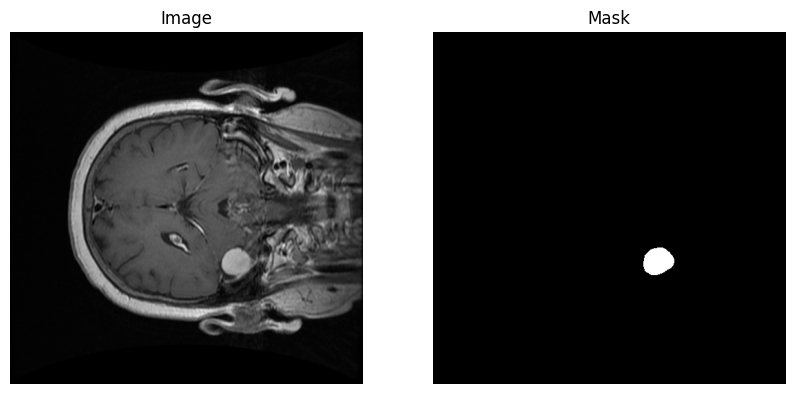

In [43]:
# display an example image and its masks
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)

ax1.imshow(example_img, cmap='gray')
ax1.set_title('Image')
ax1.axis('off')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(example_mask, cmap='gray')
ax2.set_title('Mask')
ax2.axis('off')

## 4. Segmentation accuracy metric

Semantic segmentation is about segmenting the parts of an image that belong to the same class. A semantic segmentation model makes predictions for each pixel and provides the probabilities of the classes for each pixel, but does not distinguish between different objects that belong to the same class as instance segmentation does.

 **Mean Intersection over Union**, meanIOU metric, calculates the degree of overlap between ground truth and predicted mask for each class separetly and computes the mean IOU across all classes.

In [73]:
def compute_iou(pred_mask, true_mask):
    """ A function that computes Mean Intersection over Union,
    of the predicted segmentaion mask as numpy array and
    ground truth segmentation mask as numpy array"""

    # convert into bainary
    pred_mask = pred_mask.astype(bool)
    true_mask = true_mask.astype(bool)

    # compute intersection and union
    intersection = np.logical_and(pred_mask, true_mask).sum()
    union = np.logical_or(pred_mask, true_mask).sum()

    # compute IoU while handling a possible division by zero
    iou = intersection/union if union else 1.0

    return iou

def compute_mean_iou(pred_masks, true_masks):
    """ A function that computes mean IOU across all label classes."""
    total_iou = 0
    for pred_mask, true_mask in zip(pred_masks, true_masks):
        total_iou += compute_iou(pred_mask, true_mask)
    mean_iou = total_iou/len(pred_masks)

    return mean_iou


In [76]:
# test compute_iou and compute_mean_iou with a made up example of 2D NumpPy arrays
# representing 3x3 segmentation masks
pred_mask = np.array([[1, 0, 1], [0, 1, 0], [1, 1, 1]])

true_mask = np.array([[1, 1, 1], [0, 1, 1], [1, 0, 1]])

# Calculate IoU for the first pair of masks
iou_score1 = compute_iou(pred_mask, true_mask)
print(f"IoU for the first pair of masks: {iou_score1}")

mean_iou_score = compute_mean_iou(pred_mask, true_mask)
print(f"Mean IoU across all label classes: {mean_iou_score}")


IoU for the first pair of masks: 0.625
Mean IoU across all label classes: 0.611111111111111


## 5. Upload dataset to Hugging Face Hub

Upload the segmentation dataset to Hugging Face Hub, using an access token from user's Hugging Face account settings

In [ ]:
from huggingface_hub import login

# enter login token as a keyboard input
login(token=input("Enter your Hugging Face access token: "))

dataset_name = "mri_brain_tumor_segmentation_data"
dataset.push_to_hub(dataset_name, private=True)